## **1**.) **Data Preparation**

In [ ]:
#Import essential library
import pandas as pd
import numpy as np

In [ ]:
#Load the dataset
netflix_data_url = "https://raw.githubusercontent.com/thomastrg/Netflix-recommender-system/main/netflix_titles.csv"

netflix_titles = pd.read_csv(netflix_data_url)

netflix_titles.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
netflix_titles.shape

(7787, 12)

In [ ]:
netflix_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
netflix_titles.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
#Only filter for TV shows
netflix_shows = netflix_titles[(netflix_titles.type == 'TV Show')].reset_index(drop = True)

del netflix_titles
netflix_shows.head()

show_id     type   title              director  \
0      s1  TV Show      3%                   NaN   
1      s6  TV Show      46           Serdar Akar   
2     s12  TV Show    1983                   NaN   
3     s13  TV Show    1994  Diego Enrique Osorno   
4     s17  TV Show  Feb-09                   NaN   

                                                cast                country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...                 Brazil   
1  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...                 Turkey   
2  Robert Więckiewicz, Maciej Musiał, Michalina O...  Poland, United States   
3                                                NaN                 Mexico   
4  Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...                    NaN   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1       July 1, 2017          2016  TV-MA   1 Season   
2  November 30, 2018          2018  TV-MA   1 Season   
3       May 17, 2019          2019  TV-MA   1 Season   
4     March 20, 2019          2018  TV-14   1 Season   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Dramas   
3  Crime TV Shows, Docuseries, International TV S...   
4                  International TV Shows, TV Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  A genetics professor experiments with a treatm...  
2  In this dark alt-history thriller, a naïve law...  
3  Archival video and new interviews examine Mexi...  
4  As a psychology professor faces Alzheimer's, h...

**Data Cleaning & Preprocessing**

In [ ]:
# .info() will check data types
netflix_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       2410 non-null   object
 1   type          2410 non-null   object
 2   title         2410 non-null   object
 3   director      184 non-null    object
 4   cast          2118 non-null   object
 5   country       2133 non-null   object
 6   date_added    2400 non-null   object
 7   release_year  2410 non-null   int64 
 8   rating        2408 non-null   object
 9   duration      2410 non-null   object
 10  listed_in     2410 non-null   object
 11  description   2410 non-null   object
dtypes: int64(1), object(11)
memory usage: 226.1+ KB


In [ ]:
# Check number of unique values (.nunique())
netflix_shows.nunique()

show_id         2410
type               1
title           2410
director         177
cast            2082
country          183
date_added       924
release_year      46
rating             9
duration          15
listed_in        227
description     2408
dtype: int64

In [ ]:
# Check number of missing values (.isna())
netflix_shows.isna().sum(axis=0)


show_id            0
type               0
title              0
director        2226
cast             292
country          277
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
#Remove unnecessary columns (show_id, type)
netflix_shows.drop(['show_id', 'type'], axis=1, inplace=True)

In [ ]:
#Handling with the missing values(director, cast, country, date_added, rating)
#For director, cast, country, we cann fill the missing values with "Unknown" since these are categorical features.
#The missing values in date_added will be filled with "January 1, 1800", which will be our dummy date.
#The rating columns rating already has a categoriy "NR", which means "no rating". We will used this category to fill missing values.


**Correct Data Format**

**date_added** and **duration** are currently of the data type object and should be converted to a datatime type and numerical type repectively.

In [ ]:
display(netflix_shows[['duration', 'date_added']].head().style.set_caption("Before correcting data format"))

In [ ]:
#Convert duration from string format to integer
# Remove keyword "season"
netflix_shows['duration'] = netflix_shows.duration.apply(lambda x: x.split(' ')[0])

#Convert to integer
netflix_shows['duration'] = netflix_shows['duration'].astype(int)

netflix_shows['duration'].head()

0    4
1    1
2    1
3    1
4    1
Name: duration, dtype: int64

In [ ]:
# Split the date format into year, month, day

#Convert to string
netflix_shows.date_added = netflix_shows.date_added.astype(str)

# Clean data where first character in string is a space
netflix_shows.date_added = netflix_shows.date_added.apply(lambda x : x[1:] if x[0] == " " else x)

#lambda keyword is used to define an anonymous function in Python.

In [ ]:
from pandas._libs.tslibs import strptime
from datetime import datetime

# Get the month from the 'date_added' column
netflix_shows['date_added_month'] = netflix_shows.date_added.apply(lambda x: x.split(" ")[0])

# Convert string to integer
netflix_shows['date_added_month'] = netflix_shows.date_added_month.apply(lambda x: datetime.strptime(x, '%B').month if ((x != "")&(x != "nan")) else np.nan)

# Fill nan and convert to integer
netflix_shows['date_added_month'] = netflix_shows['date_added_month'].fillna(1).astype(int)

netflix_shows['date_added_month'].head()


0     8
1     7
2    11
3     5
4     3
Name: date_added_month, dtype: int64

In [ ]:
# Get the day

import numpy as np

# Get the day from the 'date_added' column
netflix_shows['date_added_day'] = netflix_shows.date_added.apply(lambda x: x.split(" ")[1] if len(x.split(" ")) > 1 else np.nan)

# Remove ", " from the 'date_added_day'
netflix_shows['date_added_day'] = netflix_shows['date_added_day'].str.replace(",", "")

# Fill nan and convert to integer
netflix_shows['date_added_day'] = netflix_shows['date_added_day'].fillna(1).astype(int)

netflix_shows['date_added_day'].head()


0    14
1     1
2    30
3    17
4    20
Name: date_added_day, dtype: int64

In [ ]:
# Get the year

# Get the day from the 'date_added' column
netflix_shows['date_added_year'] = netflix_shows.date_added.apply(lambda x: x.split(" ")[2] if len(x.split(" ")) > 2 else np.nan)

# Fill nan and convert to integer
netflix_shows['date_added_year'] = netflix_shows['date_added_year'].fillna(1800).astype(int)

netflix_shows['date_added_year'].head()

0    2020
1    2017
2    2018
3    2019
4    2019
Name: date_added_year, dtype: int64

In [ ]:
# Convert date_added to datetime format
netflix_shows['date_added'] = netflix_shows.apply(lambda x: datetime(x.date_added_year, x.date_added_month, x.date_added_day), axis=1)

netflix_shows['date_added'].head()

0   2020-08-14
1   2017-07-01
2   2018-11-30
3   2019-05-17
4   2019-03-20
Name: date_added, dtype: datetime64[ns]

**Untangle Merged Columns**

In the dataframe we can see that **cast** and **listed_in** have names and categories that can appear in multiple data points.

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
import re

display(netflix_shows[['listed_in']].head().style.set_caption("Before using MultiLabelBinarizer"))

mlb_columns = ["listed_in", "cast", "director", "country"]
mlb = MultiLabelBinarizer()

for col in mlb_columns:
    netflix_shows[col] = netflix_shows[col].fillna("Unknown")
    netflix_shows[col] = netflix_shows[col].apply(lambda x: x.split(", ") if isinstance(x, str) else x)
    netflix_shows = netflix_shows.join(pd.DataFrame(mlb.fit_transform(netflix_shows[col]), columns=[f"{col}_{re.sub(' ', '', c)}" for c in mlb.classes_]))

# Drop only the specified mlb_columns
netflix_shows.drop(mlb_columns, axis=1, inplace=True)

# Display the resulting DataFrame
display(netflix_shows.head())



title date_added  release_year rating  duration  \
0      3% 2020-08-14          2020  TV-MA         4   
1      46 2017-07-01          2016  TV-MA         1   
2    1983 2018-11-30          2018  TV-MA         1   
3    1994 2019-05-17          2019  TV-MA         1   
4  Feb-09 2019-03-20          2018  TV-14         1   

                                         description  date_added_month  \
0  In a future where the elite inhabit an island ...                 8   
1  A genetics professor experiments with a treatm...                 7   
2  In this dark alt-history thriller, a naïve law...                11   
3  Archival video and new interviews examine Mexi...                 5   
4  As a psychology professor faces Alzheimer's, h...                 3   

   date_added_day  date_added_year  listed_in_AnimeSeries  ...  \
0              14             2020                      0  ...   
1               1             2017                      0  ...   
2              30             2018                      0  ...   
3              17             2019                      0  ...   
4              20             2019                      0  ...   

   country_Taiwan  country_Thailand  country_Turkey  country_Ukraine  \
0               0                 0               0                0   
1               0                 0               1                0   
2               0                 0               0                0   
3               0                 0               0                0   
4               0                 0               0                0   

   country_UnitedArabEmirates  country_UnitedKingdom  country_UnitedStates  \
0                           0                      0                     0   
1                           0                      0                     0   
2                           0                      0                     1   
3                           0                      0                     0   
4                           0                      0                     0   

   country_Unknown  country_Uruguay  country_WestGermany  
0                0                0                    0  
1                0                0                    0  
2                0                0                    0  
3                0                0                    0  
4                1                0                    0  

[5 rows x 13912 columns]

**Handle Text Data**

Text to Document-Term Matrix

In [ ]:
display(netflix_shows[['description']].head().style.set_table_attributes("style='display:inline'").set_caption("Before creating Document-Term Matrix"))

In [ ]:
import re
import string
import spacy
from nltk.stem import SnowballStemmer

# Load the spaCy NLP model for tokenization
nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub("[%s]" % re.escape(string.punctuation), " ", text)

    # Remove non-roman characters
    text = re.sub("([^\x00-\x7F])+", " ", text)

    # Tokenize
    text = nlp(text)

    stemmer = SnowballStemmer("english")

    text_clean = ""

    for token in text:
        # Remove stop words and remove words with fewer than 3 characters
        if (not token.is_stop) and len(token.text) > 3:
            # Lemmatize and tokenize
            text_clean += stemmer.stem(token.lemma_) + " "

    return text_clean



In [ ]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

netflix_shows['description_clean'] = netflix_shows.description.apply(lambda x: clean_text(x))

cv = CountVectorizer(ngram_range=(1,1))
data_cv = cv.fit_transform(netflix_shows['description_clean'])
data_dtm = pd.DataFrame(data_cv.toarray(), columns = cv.get_feature_names_out())
data_dtm.index = netflix_shows.index
data_dtm.columns = [f"dtm_descr_{c}" for c in data_dtm.columns]

netflix_shows = netflix_shows.join(data_dtm)

display(netflix_shows[netflix_shows.columns[netflix_shows.columns.str.startswith('dtm_descr_')]].head().style.set_caption("After creating Document-Term Matrix"))

**Feature Engineering**

Feaure Engineering can help us to gain a better understanding of our dataset.

In [ ]:
# The weekday on which the TV show was added to the library
netflix_shows['date_added_weekday'] = pd.DatetimeIndex(netflix_shows['date_added']).weekday

# The release year of the first season of the TV show
netflix_shows['first_release_year'] = netflix_shows.release_year - netflix_shows.duration

# The time between the original release of the TV shows and the TV show being added to the Netflix library
netflix_shows['time_first_release_to_netflix'] = netflix_shows.date_added_year - netflix_shows.first_release_year

In [ ]:
# Save current state to output
netflix_shows.to_csv("netflix_shows.csv", index = False)

## **2.) Exploratory Data Analysis**

For the visualizations, we will be using the libraries **matplotlib** and **seaborn**.

In [ ]:
#Import essential library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

from wordcloud import WordCloud, STOPWORDS# Generate word cloud

import warnings
warnings.filterwarnings("ignore")

In [ ]:
netflix_shows = pd.read_csv("netflix_shows.csv")

In [ ]:
netflix_shows.head()

title  date_added  release_year rating  duration  \
0      3%  2020-08-14          2020  TV-MA         4   
1      46  2017-07-01          2016  TV-MA         1   
2    1983  2018-11-30          2018  TV-MA         1   
3    1994  2019-05-17          2019  TV-MA         1   
4  Feb-09  2019-03-20          2018  TV-14         1   

                                         description  date_added_month  \
0  In a future where the elite inhabit an island ...                 8   
1  A genetics professor experiments with a treatm...                 7   
2  In this dark alt-history thriller, a naïve law...                11   
3  Archival video and new interviews examine Mexi...                 5   
4  As a psychology professor faces Alzheimer's, h...                 3   

   date_added_day  date_added_year  listed_in_AnimeSeries  ...  \
0              14             2020                      0  ...   
1               1             2017                      0  ...   
2              30             2018                      0  ...   
3              17             2019                      0  ...   
4              20             2019                      0  ...   

   dtm_descr_zoid  dtm_descr_zombi  dtm_descr_zone  dtm_descr_zoologist  \
0               0                0               0                    0   
1               0                0               0                    0   
2               0                0               0                    0   
3               0                0               0                    0   
4               0                0               0                    0   

   dtm_descr_zordon  dtm_descr_zulu  dtm_descr_zumbo  date_added_weekday  \
0                 0               0                0                   4   
1                 0               0                0                   5   
2                 0               0                0                   4   
3                 0               0                0                   4   
4                 0               0                0                   2   

   first_release_year  time_first_release_to_netflix  
0                2016                              4  
1                2015                              2  
2                2017                              1  
3                2018                              1  
4                2017                              2  

[5 rows x 20574 columns]

**Categorical Feature**

In [ ]:
# Rating

netflix_shows['rating'].value_counts()

TV-MA       1018
TV-14        659
TV-PG        301
TV-Y7        176
TV-Y         163
TV-G          83
NR             5
R              2
TV-Y7-FV       1
Name: rating, dtype: int64

The rating categories have the following meaning:

* TV-Y: for 2-6 years

* TV-Y7: for >= 7 year

* TV-G: for all ages

* TV-PG: for parental guidance

* TV-14: for >= 14 years

* TV-MA: for mature adult

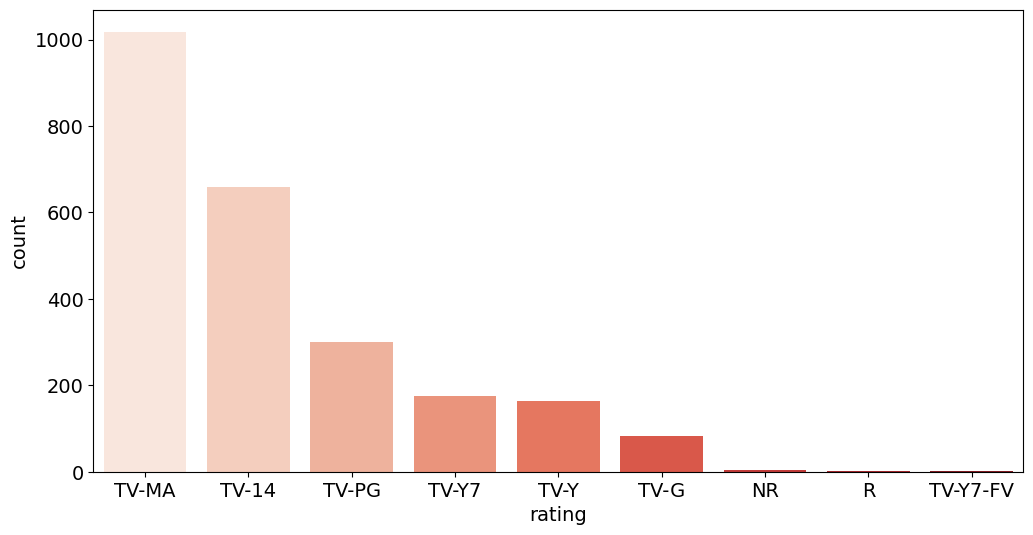

In [ ]:
# Plot the graph of rating value count

# Convert 'rating' column to categorical data type
netflix_shows['rating'] = netflix_shows['rating'].astype('category')

# Get the order of categories based on descending count
order = netflix_shows['rating'].value_counts().index

# Plot the graph of rating value count
fig = plt.figure(figsize=(12, 6))
sns.countplot(data=netflix_shows, x='rating', palette='Reds', order=order)
plt.show()

Findings:


* The most common rating is TV-MA, followed by TV-14 and TV-PG. This means that the majority of TV shows are intended for more mature audiences.

* Rating R and TV-Y7-FV seem to be mislabeled data points

* Rating NR could be the result of imputed missing ratings and mean "not rated"

* The least common rating is TV-G, followed by TV-Y and TV-Y7. These are the ratings for younger audiences.

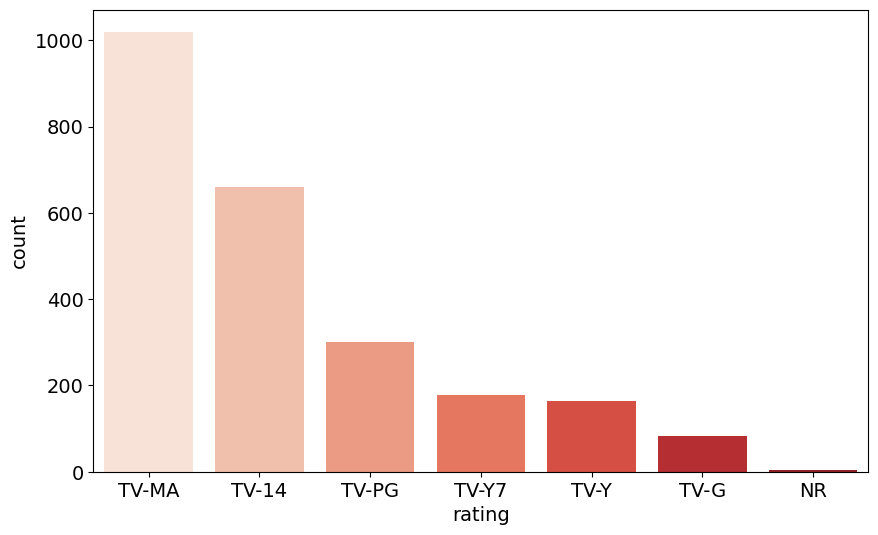

In [ ]:

# Clean up ratings by replacing them with plausible counterparts

# Replace the ratings if needed
netflix_shows["rating"] = netflix_shows["rating"].replace({"TV-Y7-FV": "TV-Y7", "R": "TV-MA"})

# Convert the "rating" column to a categorical data type
netflix_shows["rating"] = netflix_shows["rating"].astype('category')

# Get the order of categories based on descending count
order = netflix_shows['rating'].value_counts().index

# Create the count plot
fig = plt.figure(figsize=(10, 6))
sns.countplot(x="rating", data=netflix_shows, palette='Reds', order=order)
plt.show()


**Added Date**

In the date_added_weekday, this feature has the datatype integer however due to fact that there are only seven unique days in a week.

In [ ]:
netflix_shows['date_added_year'].head()

0    2020
1    2017
2    2018
3    2019
4    2019
Name: date_added_year, dtype: int64

In [ ]:
pip install --upgrade seaborn


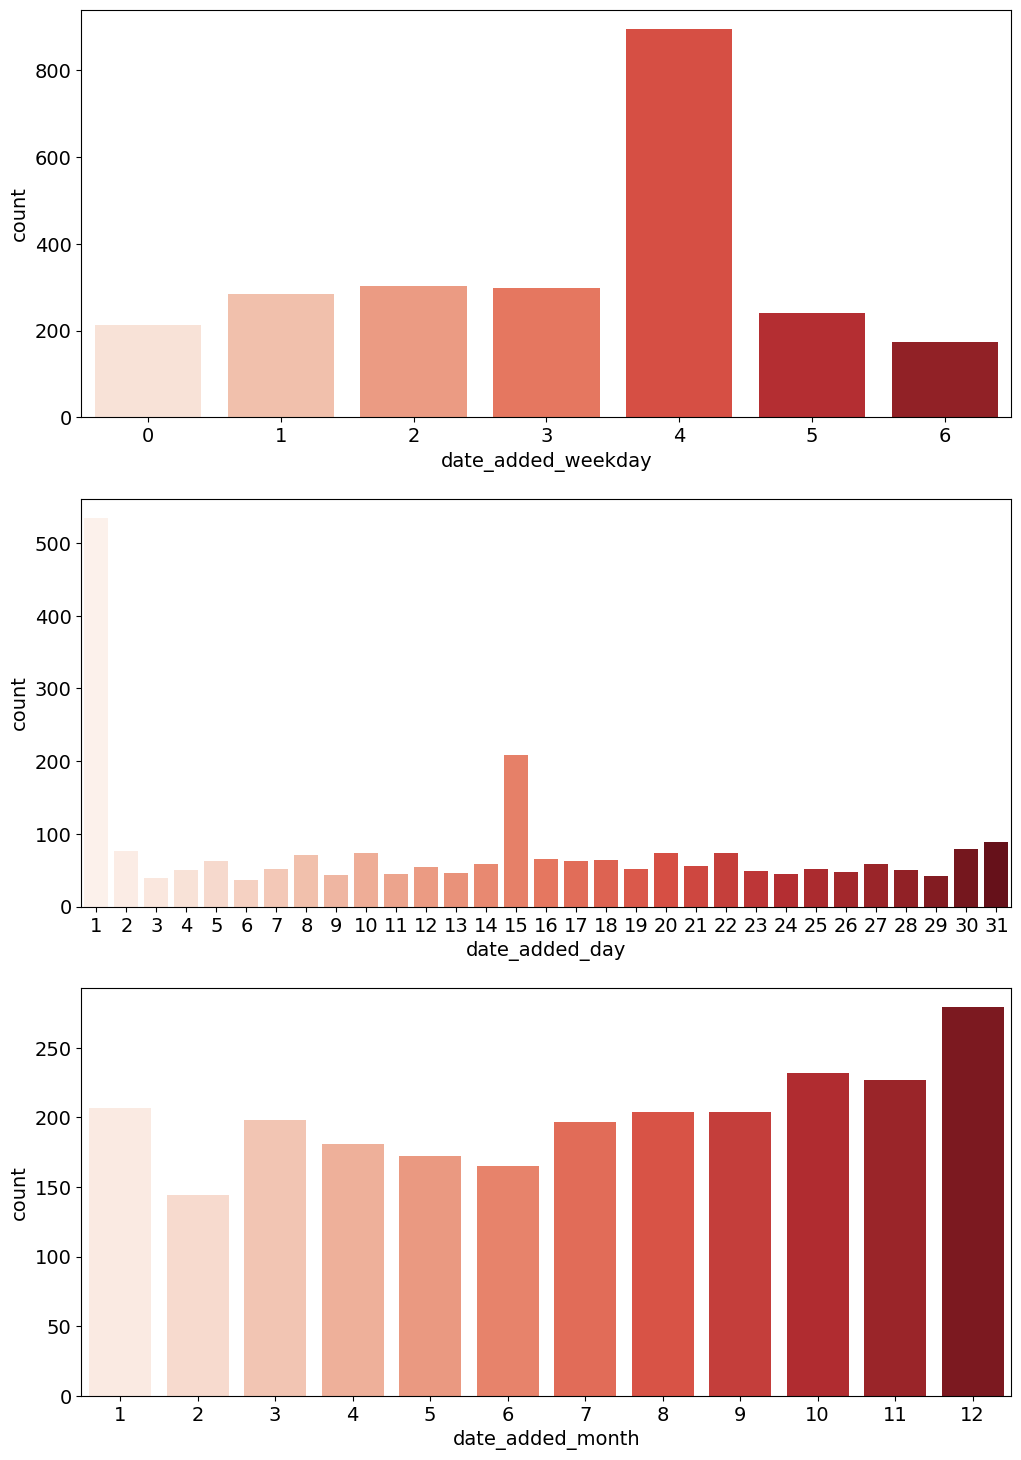

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(12,18))
sns.countplot(x = netflix_shows["date_added_weekday"], palette='Reds', ax=ax[0])
sns.countplot(x = netflix_shows["date_added_day"], palette='Reds', ax=ax[1])
sns.countplot(x = netflix_shows["date_added_month"], palette='Reds', ax=ax[2])
plt.show()

Findings:

* There are seven days in a week with Monday being represented by 0 and sunday being represented by 6

* Most TV shows are added on Fridays

* Fewer TV shows are added on Monday and weekdays

* Most TV shows are added on the first or the 15th of a month

* Most TV shows are added in December

* The least TV shows are added in February

**Director**

In [ ]:
display(netflix_shows[netflix_shows.columns[netflix_shows.columns.str.startswith('director')]].sum(axis=0).sort_values(ascending=False))

netflix_shows.drop("director_Unknown", axis=1, inplace=True)

director_Unknown               2226
director_KenBurns                 3
director_AlastairFothergill       3
director_LynnNovick               2
director_StanLathan               2
                               ... 
director_JaimeRayo                1
director_JakobSchuh               1
director_JakobVerbruggen          1
director_JalilLespert             1
director_ZiadDoueiri              1
Length: 229, dtype: int64

Findings:

* Ken Burns and Alastair Forthergill are the only director to have directed three TV shows on Netflix

* For the majority of TV shows on Netflix the director is unknown in this dataset, so we could drop this column.

* There are 228 unique directors

* The majority of director have directed one TV shows on Netflix

**Country**

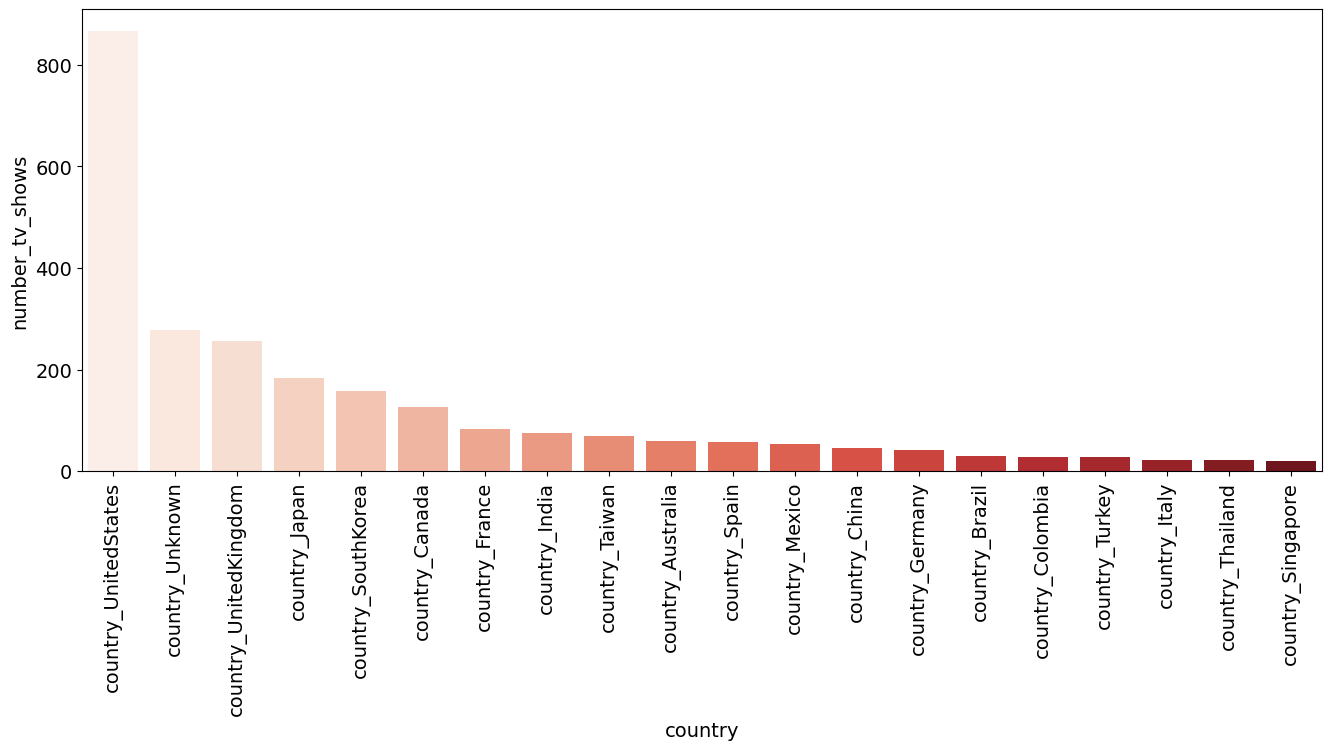

In [ ]:
temp = netflix_shows[netflix_shows.columns[netflix_shows.columns.str.startswith('country')]].sum(axis=0).sort_values(ascending=False).to_frame().reset_index()

temp.columns = ['country', 'number_tv_shows']

fig, ax = plt.subplots(1,1, figsize=(16,6))

sns.barplot(data = temp[temp.number_tv_shows > 20], x='country', y='number_tv_shows', palette='Reds')

for tick in ax.xaxis.get_major_ticks():
  tick.label.set_rotation(90)

plt.show()

**Findings:**

* There are 66 countries in which Netflix TV shows are available

* The most TV shows are available in the United State of America, which makes senses since Netflix was founded there

* For a lot of TV shows the country is unkown, so we remove the columns.

* The second Most TV shows are available in the United Kingdom, followed by japan and South Korea

**Cast**

In [ ]:
display(netflix_shows[netflix_shows.columns[netflix_shows.columns.str.startswith('cast')]].sum(axis=0).sort_values(ascending=False))

cast_Unknown            292
cast_TakahiroSakurai     22
cast_YukiKaji            17
cast_DaisukeOno          16
cast_AiKayano            16
                       ... 
cast_IshaiGolan           1
cast_IsilYücesoy          1
cast_IsisCabolet          1
cast_IsisHainsworth       1
cast_ŞükrüÖzyıldız        1
Length: 13586, dtype: int64

Findings:

* There are over 13000 actors starring in Netflix TV shows

* Actors starring in the most TV shows are all japanese

**Category**

In [ ]:
display(netflix_shows[netflix_shows.columns[netflix_shows.columns.str.startswith('listed_in')]].sum(axis=0).sort_values(ascending=False))


listed_in_InternationalTVShows        1199
listed_in_TVDramas                     704
listed_in_TVComedies                   525
listed_in_CrimeTVShows                 427
listed_in_Kids'TV                      414
listed_in_Docuseries                   353
listed_in_RomanticTVShows              333
listed_in_BritishTVShows               232
listed_in_RealityTV                    222
listed_in_TVAction&Adventure           150
listed_in_KoreanTVShows                150
listed_in_AnimeSeries                  148
listed_in_Spanish-LanguageTVShows      147
listed_in_TVMysteries                   90
listed_in_Science&NatureTV              85
listed_in_TVSci-Fi&Fantasy              76
listed_in_TVHorror                      69
listed_in_TeenTVShows                   60
listed_in_Stand-UpComedy&TalkShows      52
listed_in_TVThrillers                   50
listed_in_Classic&CultTV                27
listed_in_TVShows                       12
dtype: int64

<Axes: ylabel='count'>

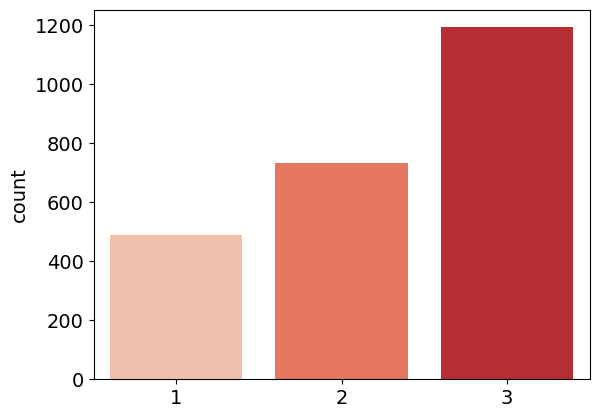

In [ ]:
temp = netflix_shows[netflix_shows.columns[netflix_shows.columns.str.startswith('listed_in')]].sum(axis=1)

sns.countplot(x=temp, palette='Reds')

Findings:

* There are over 22 categories for Netflix TV shows

* The most common category is "International TV shows"

* The category "TV Shows" seems to be a filler for unkown category. we could drop this column

* The least common category is "classic & Cult TV"

* A TV show is listed in at least one category. Roughly half of all TV shows on Netflix are listed in three category.

* Some categories describe the origin instead of the content such as "British TV shows", "International TV shows", "Korean TV shows", "Spanish Language TV shows"

* Some categories describe the audience instead of the content such as "kid's TV" and "Teen TV shows"

In [ ]:
# Drop "listed_in_TVshows" form the list
netflix_shows.drop("listed_in_TVShows", axis=1, inplace=True)

category_cols = ['listed_in_AnimeSeries',
                 'listed_in_Classic&CultTV',
                 'listed_in_CrimeTVShows',
                 'listed_in_Docuseries',
                 'listed_in_RealityTV',
                 'listed_in_RomanticTVShows',
                 'listed_in_Science&NatureTV',
                 'listed_in_Stand-UpComedy&TalkShows',
                 'listed_in_TVAction&Adventure',
                 'listed_in_TVComedies',
                 'listed_in_TVDramas',
                 'listed_in_TVHorror',
                 'listed_in_TVMysteries',
                 'listed_in_TVSci-Fi&Fantasy',
                 'listed_in_TVThrillers',
                 "listed_in_Kids'TV"]

display(netflix_shows[category_cols].sum(axis=0).sort_values(ascending=False))

listed_in_TVDramas                    704
listed_in_TVComedies                  525
listed_in_CrimeTVShows                427
listed_in_Kids'TV                     414
listed_in_Docuseries                  353
listed_in_RomanticTVShows             333
listed_in_RealityTV                   222
listed_in_TVAction&Adventure          150
listed_in_AnimeSeries                 148
listed_in_TVMysteries                  90
listed_in_Science&NatureTV             85
listed_in_TVSci-Fi&Fantasy             76
listed_in_TVHorror                     69
listed_in_Stand-UpComedy&TalkShows     52
listed_in_TVThrillers                  50
listed_in_Classic&CultTV               27
dtype: int64

Findings: If we remove the categories "TVShow", "British TV Shows", "International TV Shows", "Korean TV Shows", "Spanish Language TV Shows", "Teen TV Shows", we find the following:

* There are 14 TV shows without any category

* The most common category is "TV Dramas"

* The least common category is "Classic & Cult TV"



<Axes: ylabel='count'>

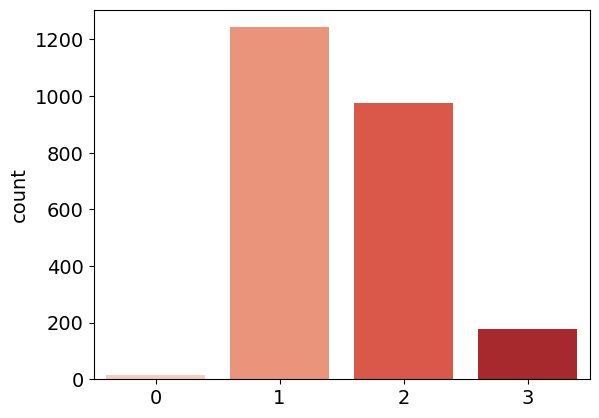

In [ ]:
#Draw the graph
temp = netflix_shows[category_cols].sum(axis=1)
sns.countplot(x = temp, palette='Reds')

Findings:

* A TV show is listed in at least one category. Most TV shows on Netflix are listed in one category.

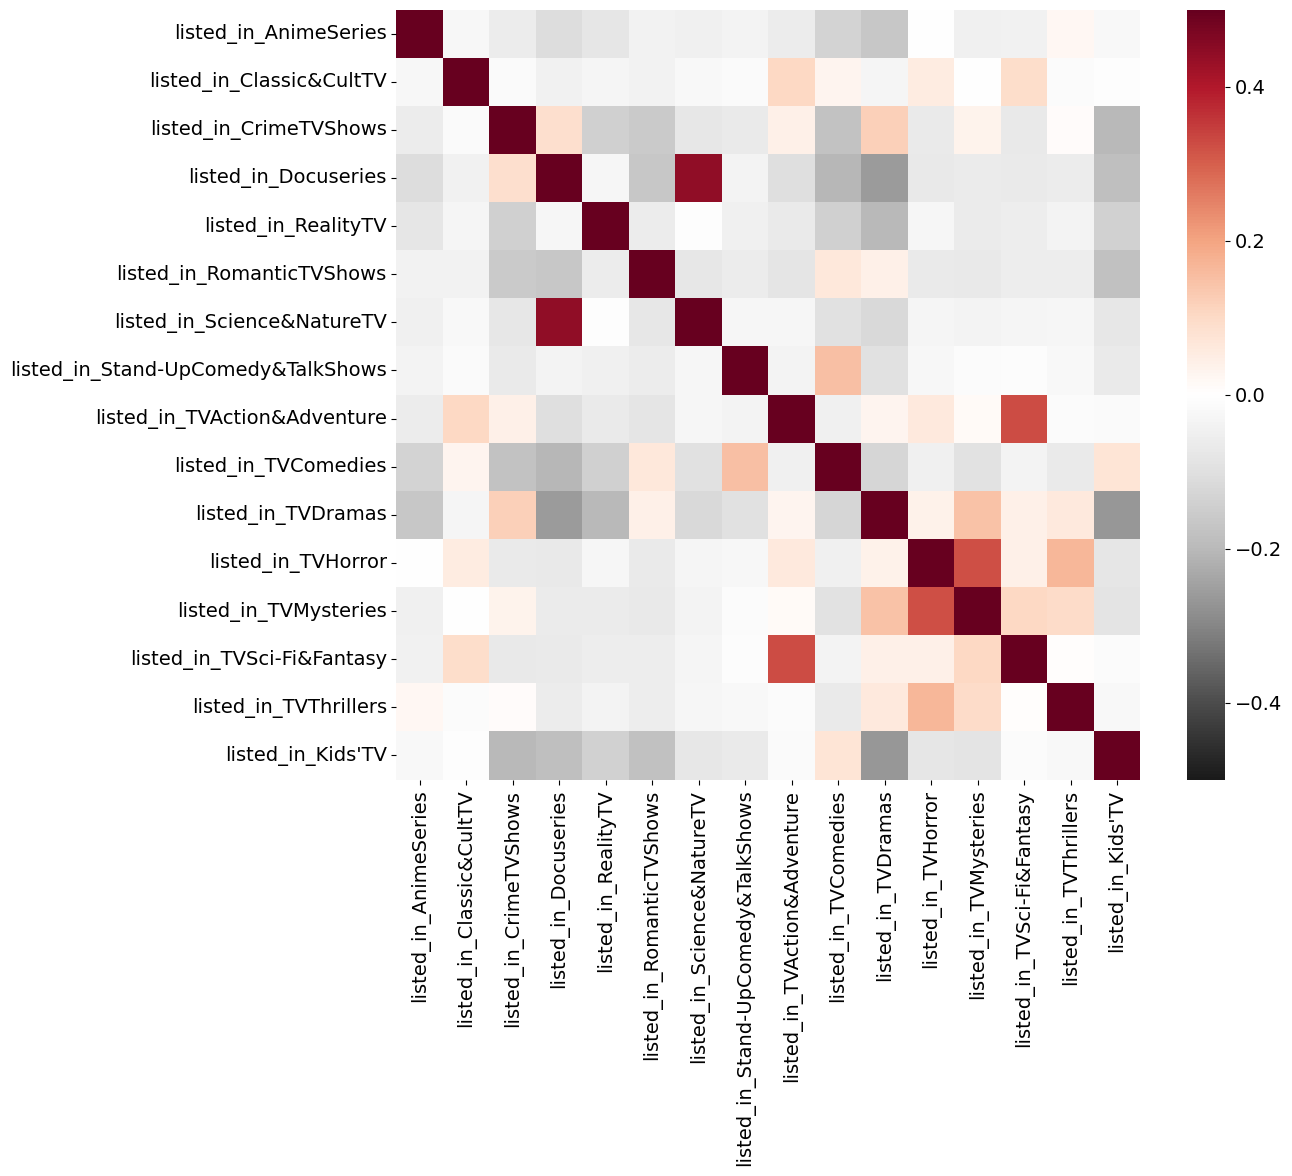

In [ ]:
#Draw correlation
temp = netflix_shows[category_cols].corr()

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
sns.heatmap(data=temp, cmap='RdGy_r', vmin=-0.5, vmax=0.5)
plt.show()


Findings:

* "Docuseries" and "Science & Nature TV" are highly correlated as well as "TV Action & Adventure" and "TV Sci-Fi&Fantasy" and also "TV Horro" and "TV Mysteries"

* "TV Dramas" is negatively correlated with "Docuseries" and "kid's TV"

#### **Numerical Feature**

You can use **.histplot()** from the seaborn library to plot histograms or **.kdeplot()** to plot the kernel density estimate (KDE). Both are ways to quickly get an understanding of the features distribution. Additionally, you can use **.boxplot()** to plot the box plot and detect outliers.

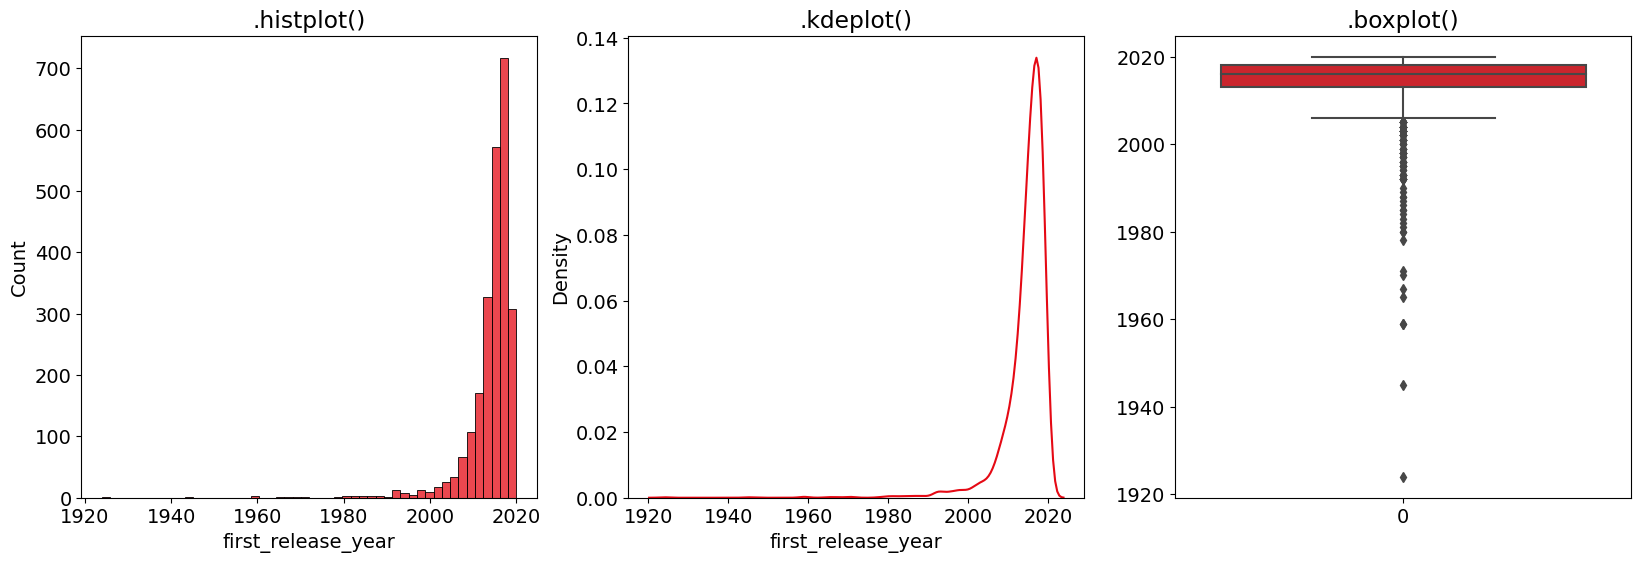

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

sns.histplot(netflix_shows.first_release_year, ax=ax[0], bins=50, color="#E50914")
ax[0].set_title('.histplot()')

sns.kdeplot(netflix_shows.first_release_year, ax=ax[1], color="#E50914")
ax[1].set_title('.kdeplot()')

sns.boxplot(netflix_shows.first_release_year, ax=ax[2], color="#E50914")
ax[2].set_title('.boxplot()')

plt.show()


Findings:

* Since the 2000s the number of TV  shows has been growing almost exponentially

* The world's first television stations first started appearing in the United State of America in the late  1920s and early 1930s. There are no TV shows with an earlier first release year before 1920s.

In [ ]:
# Removing missing values maked with 1800 and display the remaining dataset

display(netflix_shows.date_added_year[netflix_shows.date_added_year != 1800].value_counts())

2020    697
2019    656
2018    430
2017    361
2016    185
2015     30
2021     29
2014      6
2013      5
2008      1
Name: date_added_year, dtype: int64

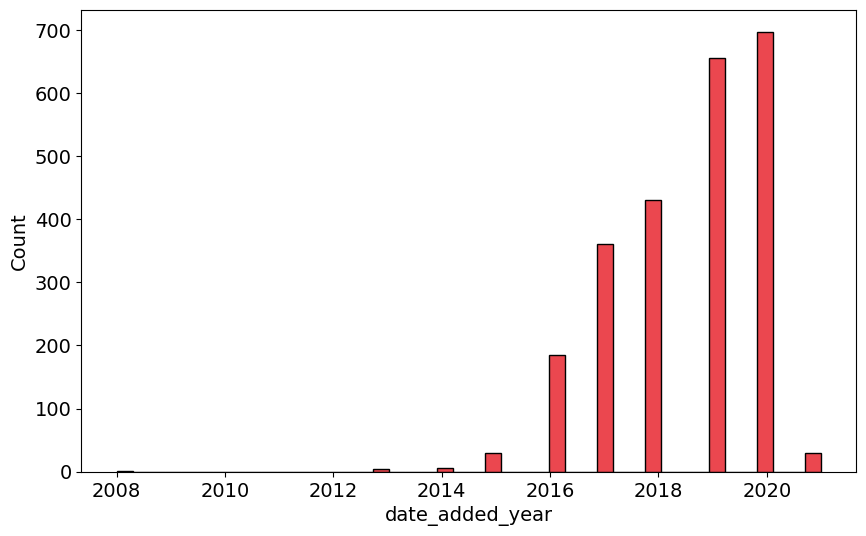

In [ ]:
# Draw the graph of above dataset
fig = plt.figure(figsize=(10,6))
sns.histplot(netflix_shows.date_added_year[netflix_shows.date_added_year != 1800], color="#E50914")
plt.show()

Findings:

* The amount of added TV shows has been steadily increasing over the past five year

* Since we have only updated data on 2021 half part, we are not going to beyond

### **Text Data**

In [ ]:
# Display the text data set
display(netflix_shows[netflix_shows.columns[netflix_shows.columns.str.startswith('dtm_descr')]].sum(axis=0).sort_values(ascending=False).head(15))

dtm_descr_life        328
dtm_descr_seri        285
dtm_descr_world       251
dtm_descr_famili      213
dtm_descr_friend      202
dtm_descr_love        189
dtm_descr_find        176
dtm_descr_young       168
dtm_descr_woman       158
dtm_descr_year        139
dtm_descr_school      129
dtm_descr_high        119
dtm_descr_power       117
dtm_descr_adventur    114
dtm_descr_mysteri     114
dtype: int64

In [ ]:
display(netflix_shows[netflix_shows.columns[netflix_shows.columns.str.startswith('dtm_title')]].sum(axis=0).sort_values(ascending=False).head(15))

Series([], dtype: float64)

### **Relationships**

Here are some hypothesis about the relationship between the different dataset:

* How are the rating and the category correlated?

* Why are TV shows added at specific times (on Fridays, on the 1st or the 15th, during winter months)

* How do countries differ in category / rating preferences between countries?

* Are there any relationships between cast and director within countries?

* Can we see any trend over the past years regarding popularity of TV show types?

* What differentiates a TV show with 16 seasons from
one with only 1 season?

* How do ratings/categories differ in their title/descriptions?

In [ ]:
## Relationsships
temp = netflix_shows.groupby('rating')[netflix_shows.columns[netflix_shows.columns.str.startswith('listed_in')]].sum().T
temp = temp[['NR', 'TV-Y', 'TV-Y7', 'TV-G', 'TV-PG',  'TV-14','TV-MA', ]]
display(temp.style.background_gradient(cmap='Reds', vmin=0, vmax=100).format("{:.0f}").set_caption('Number Training Pathes per Floor for Buildings in Test Set'))

display(netflix_shows[(netflix_shows.listed_in_TVThrillers == 1) & ((netflix_shows.rating == "TV-Y") | (netflix_shows.rating == "TV-Y7"))])

title  date_added  release_year rating  duration  \
331        Carmen Sandiego  2021-01-15          2021  TV-Y7         4   
1977            The Hollow  2020-05-08          2020  TV-Y7         2   
2215  Treehouse Detectives  2018-11-09          2018   TV-Y         2   

                                            description  date_added_month  \
331   A master thief who uses her skills for good, C...                 1   
1977  Three teens join forces to find a way home aft...                 5   
2215  When their animal friends need help, brother-a...                11   

      date_added_day  date_added_year  listed_in_AnimeSeries  ...  \
331               15             2021                      0  ...   
1977               8             2020                      0  ...   
2215               9             2018                      0  ...   

      dtm_descr_zoid  dtm_descr_zombi  dtm_descr_zone  dtm_descr_zoologist  \
331                0                0               0                    0   
1977               0                0               0                    0   
2215               0                0               0                    0   

      dtm_descr_zordon  dtm_descr_zulu  dtm_descr_zumbo  date_added_weekday  \
331                  0               0                0                   4   
1977                 0               0                0                   4   
2215                 0               0                0                   4   

      first_release_year  time_first_release_to_netflix  
331                 2017                              4  
1977                2018                              2  
2215                2016                              2  

[3 rows x 20571 columns]

In [ ]:
temp = netflix_shows[netflix_shows.date_added_year != 1800].groupby('date_added_year').date_added_weekday.value_counts().to_frame()
temp.columns = ['weekday_count']
temp.reset_index(drop=False, inplace=True)
temp = temp.pivot(index='date_added_year', columns='date_added_weekday').weekday_count
temp.style.background_gradient(cmap='Reds', vmin=0, vmax=200).format("{:.0f}")#.set_caption('Number Training Pathes per Floor for Buildings in Test Set')

Findings:

* Most TV shows are added on Fridays (weekday 4)

* There is an increase of TV shows added on wednesdays (weekday 2) in 2020

In [ ]:
# Save current state to output
netflix_shows.to_csv("netflix_shows.csv", index=False)